<a href="https://colab.research.google.com/github/anumit2004/Supervised-Learning-Models/blob/linear-regression/build_minibatch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINIBATCH GRADIENT DESCENT**

Same as stochastic gd.The main differeence is that it will take a batch on the place of only one instance .

This is the best approach for linear regression. As SGD has a drawback like if all the given point are close , then SGD will get trapped , So here minibatch comes into play.

CALCULATION:

GD=gradients = 2/m * xi.T @ (xi @ theta - yi) # for Minibatch, m is the batch size.

In [ ]:
import numpy as np
class minibatchGD:
  def __init__(self,lr=.01,batch_size=3,epochs=1000,tol=1e-6):
    self.learning_rate=lr
    self.batch_size=batch_size
    self.epochs=epochs
    self.tol=tol

  def learning_schedule(self,t):
    t0=5;
    t1=50;
    return t0/(t+t1)

  def predict(self,x):
    return np.dot(x,self.weight)+self.bias

  def mean_squared_error(self,y_pred,y_true):
    return np.mean((y_pred-y_true)**2)

  def gradient(self,x,y):
    y_pred=self.predict(x)
    err=y_pred-y
    dw=(1/self.batch_size)*np.dot(x.T,err)
    db=(1/self.batch_size)*np.sum(err)
    return dw,db

  def fit(self,x,y):
    self.m,self.n=x.shape
    self.weight=np.zeros(self.n)
    self.bias=0
    for i in range(self.epochs):
      indices=np.random.permutation(self.m)
      x_shuffle=x[indices]
      y_shuffle=y[indices]
      for j in range(0,self.m,self.batch_size):
        x_batch=x_shuffle[j:j+self.batch_size]
        y_batch=y_shuffle[j:j+self.batch_size]
        dw,db=self.gradient(x_batch,y_batch)
        self.learing_rate=self.learning_schedule(self.epochs+j)
        self.weight-=self.learning_rate*dw
        self.bias-=self.learning_rate*db
        w_norm=np.linalg.norm(self.weight)
        if(w_norm<self.tol):
          print('covergence reached !!!')
          break
    return self.weight,self.bias


Test this model

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/salary_data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values

In [ ]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,random_state=4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(12, 1)
(18,)
(12,)


In [ ]:
model=minibatchGD()
weight_final,bias_final=model.fit(x_train,y_train)
print('weight = ',weight_final)
print('bias = ',bias_final)

weight =  [9483.54451565]
bias =  25245.67374726961


In [ ]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[ 63179.85180985  92578.83980835 122926.18225842  71715.04187393
  89733.77645366 110597.57438808  75508.45968019 124822.89116154
  82146.94084114  35677.57271448  44212.76277856  73611.75077706]
[ 55794  98273 122391  67938  91738 105582  83088 121872  93940  39343
  43525  66029]


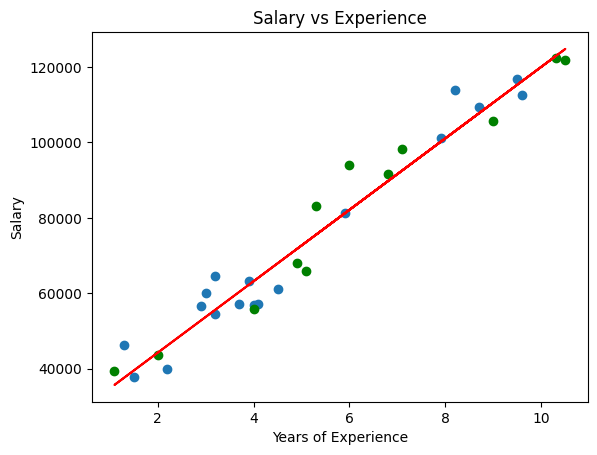

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,color='red')
plt.scatter(x_test,y_test,color='green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [ ]:
mean_squared_error=model.mean_squared_error(y_pred,y_test)
print('mean squared error = ',mean_squared_error)

mean squared error =  33944962.473476626
